In [1]:
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd



In [3]:
data1=pd.read_csv('GSE152418-original.csv')
data1.set_index('Gene Symbol', inplace=True)

In [4]:
new_columns = []
control_count = 1
sarscov2_count = 1

for col in data1.columns:
    if col.startswith("Healthy"):
        new_columns.append(f"Control ({control_count})")
        control_count += 1
    else:
        new_columns.append(f"SARS-CoV-2 ({sarscov2_count})")
        sarscov2_count += 1

data1.columns = new_columns


In [5]:
control_cols = [col for col in data1.columns if col.startswith("Control")]
sars_cols = [col for col in data1.columns if not col.startswith("Control")]


data1 = data1[control_cols + sars_cols]


In [6]:
data1.columns

Index(['Control (1)', 'Control (2)', 'Control (3)', 'Control (4)',
       'Control (5)', 'Control (6)', 'Control (7)', 'Control (8)',
       'Control (9)', 'Control (10)', 'Control (11)', 'Control (12)',
       'Control (13)', 'Control (14)', 'Control (15)', 'Control (16)',
       'Control (17)', 'SARS-CoV-2 (1)', 'SARS-CoV-2 (2)', 'SARS-CoV-2 (3)',
       'SARS-CoV-2 (4)', 'SARS-CoV-2 (5)', 'SARS-CoV-2 (6)', 'SARS-CoV-2 (7)',
       'SARS-CoV-2 (8)', 'SARS-CoV-2 (9)', 'SARS-CoV-2 (10)',
       'SARS-CoV-2 (11)', 'SARS-CoV-2 (12)', 'SARS-CoV-2 (13)',
       'SARS-CoV-2 (14)', 'SARS-CoV-2 (15)', 'SARS-CoV-2 (16)'],
      dtype='object')

In [7]:
data1.to_csv('GSE152418-Clean.csv',index=True)

In [8]:
data1

,Control (1),Control (2),Control (3),Control (4),Control (5),Control (6),Control (7),Control (8),Control (9),Control (10),...,SARS-CoV-2 (7),SARS-CoV-2 (8),SARS-CoV-2 (9),SARS-CoV-2 (10),SARS-CoV-2 (11),SARS-CoV-2 (12),SARS-CoV-2 (13),SARS-CoV-2 (14),SARS-CoV-2 (15),SARS-CoV-2 (16)
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
OR4F5,0,0,0,0,0,0,0,0,3,0,...,1,1,0,0,0,0,0,0,0,0
OR4F29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,1,2,0,1,1,0,1,4,1,0,...,0,9,0,7,3,0,0,2,0,2
NOC2L,2381,1964,1669,1883,1940,2027,2054,1892,1897,2229,...,1379,1596,1266,2004,1017,1345,1750,1724,1530,1485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC102723407,25,20,43,108,286,69,787,37,58,90,...,107,1685,1950,8633,2713,1495,2099,1063,1731,5696
LOC124905564,69,96,88,57,53,52,76,62,48,88,...,24,32,49,44,48,22,44,113,120,40
LOC124905693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data2=pd.read_csv('GSE161731-original.csv')
data2.set_index('Gene Symbol', inplace=True)

In [10]:
data2.columns

Index(['Bacterial (1)', 'Influenza (1)', 'Influenza (2)', 'Influenza (3)',
       'Influenza (4)', 'Influenza (5)', 'Influenza (6)', 'CoV other (1)',
       'CoV other (2)', 'SARS_CoV_2 (1)',
       ...
       'CoV other (54)', 'CoV other (55)', 'CoV other (56)', 'CoV other (57)',
       'CoV other (58)', 'CoV other (59)', 'Influenza (14)', 'Influenza (15)',
       'Influenza (16)', 'Influenza (17)'],
      dtype='object', length=192)

In [11]:

group_map = data2.columns.str.extract(r"^([\w\s]+?)\s*\(")[0]
group_map.index = data2.columns  # align group names with columns


grouped_dataframes = {
    group: data2.loc[:, group_map[group_map == group].index].copy()
    for group in group_map.unique()
}


In [12]:
grouped_dataframes.keys()

dict_keys(['Bacterial', 'Influenza', 'CoV other', 'SARS_CoV_2', 'SARS_CoV_2_Yes', 'HLTY'])

In [13]:

combined_df = pd.concat(
    [grouped_dataframes["HLTY"], grouped_dataframes["SARS_CoV_2_Yes"]],
    axis=1
)
combined_df.index.name = "Gene Symbol"


In [14]:
combined_df.columns

Index(['HLTY (1)', 'HLTY (2)', 'HLTY (3)', 'HLTY (4)', 'HLTY (5)', 'HLTY (6)',
       'HLTY (7)', 'HLTY (8)', 'HLTY (9)', 'HLTY (10)', 'HLTY (11)',
       'HLTY (12)', 'HLTY (13)', 'HLTY (14)', 'HLTY (15)', 'HLTY (16)',
       'SARS_CoV_2_Yes (1)', 'SARS_CoV_2_Yes (2)', 'SARS_CoV_2_Yes (3)',
       'SARS_CoV_2_Yes (4)', 'SARS_CoV_2_Yes (5)', 'SARS_CoV_2_Yes (6)',
       'SARS_CoV_2_Yes (7)', 'SARS_CoV_2_Yes (8)', 'SARS_CoV_2_Yes (9)',
       'SARS_CoV_2_Yes (10)', 'SARS_CoV_2_Yes (11)', 'SARS_CoV_2_Yes (12)'],
      dtype='object')

In [15]:
new_columns = []
control_count = 1
sarscov2_count = 1

for col in combined_df.columns:
    if col.startswith("HLTY"):
        new_columns.append(f"Control ({control_count})")
        control_count += 1
    else:
        new_columns.append(f"SARS-CoV-2 ({sarscov2_count})")
        sarscov2_count += 1

combined_df.columns = new_columns


In [16]:
combined_df

,Control (1),Control (2),Control (3),Control (4),Control (5),Control (6),Control (7),Control (8),Control (9),Control (10),...,SARS-CoV-2 (3),SARS-CoV-2 (4),SARS-CoV-2 (5),SARS-CoV-2 (6),SARS-CoV-2 (7),SARS-CoV-2 (8),SARS-CoV-2 (9),SARS-CoV-2 (10),SARS-CoV-2 (11),SARS-CoV-2 (12)
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
OR4F5,1,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,1,0,0,0
LOC112268260,84,59,42,117,100,45,108,218,121,107,...,56,61,42,116,27,75,91,1,77,151
OR4F29,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,0
LOC105378947,6,1,4,11,8,0,10,10,1,11,...,25,14,13,35,0,0,12,0,16,21
OR4F16,79,28,22,49,85,22,89,256,31,54,...,22,27,18,86,27,20,91,1,40,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND4L,29422,33312,32129,36382,53899,17092,83143,16973,24814,47085,...,29089,24324,16269,11845,79204,40962,5438,33000,12005,8312
ND4,241493,264798,286909,292982,441295,123561,708233,131494,207010,372245,...,427398,263065,175195,122386,679627,602396,82795,208924,92687,65843
ND5,89361,113243,119949,128087,208321,53452,266877,60950,71235,137250,...,108366,88605,50893,37930,223532,185647,20005,76929,27406,20412


In [17]:
combined_df.to_csv('GSE161731-Clean.csv',index=True)

In [18]:
data3=pd.read_csv('GSE171110-original.csv')
data3.set_index('Gene Symbol', inplace=True)

In [19]:
data3.columns

Index(['HLTY (1)', 'HLTY (2)', 'HLTY (3)', 'HLTY (4)', 'HLTY (5)', 'HLTY (6)',
       'HLTY (7)', 'HLTY (8)', 'HLTY (9)', 'HLTY (10)', 'SARS_CoV_2 (1)',
       'SARS_CoV_2 (2)', 'SARS_CoV_2 (3)', 'SARS_CoV_2 (4)', 'SARS_CoV_2 (5)',
       'SARS_CoV_2 (6)', 'SARS_CoV_2 (7)', 'SARS_CoV_2 (8)', 'SARS_CoV_2 (9)',
       'SARS_CoV_2 (10)', 'SARS_CoV_2 (11)', 'SARS_CoV_2 (12)',
       'SARS_CoV_2 (13)', 'SARS_CoV_2 (14)', 'SARS_CoV_2 (15)',
       'SARS_CoV_2 (16)', 'SARS_CoV_2 (17)', 'SARS_CoV_2 (18)',
       'SARS_CoV_2 (19)', 'SARS_CoV_2 (20)', 'SARS_CoV_2 (21)',
       'SARS_CoV_2 (22)', 'SARS_CoV_2 (23)', 'SARS_CoV_2 (24)',
       'SARS_CoV_2 (25)', 'SARS_CoV_2 (26)', 'SARS_CoV_2 (27)',
       'SARS_CoV_2 (28)', 'SARS_CoV_2 (29)', 'SARS_CoV_2 (30)',
       'SARS_CoV_2 (31)', 'SARS_CoV_2 (32)', 'SARS_CoV_2 (33)',
       'SARS_CoV_2 (34)', 'SARS_CoV_2 (35)', 'SARS_CoV_2 (36)',
       'SARS_CoV_2 (37)', 'SARS_CoV_2 (38)', 'SARS_CoV_2 (39)',
       'SARS_CoV_2 (40)', 'SARS_CoV_2 (41)', 'SAR

In [20]:
new_columns = []
control_count = 1
sarscov2_count = 1

for col in data3.columns:
    if col.startswith("HLTY"):
        new_columns.append(f"Control ({control_count})")
        control_count += 1
    else:
        new_columns.append(f"SARS-CoV-2 ({sarscov2_count})")
        sarscov2_count += 1

data3.columns = new_columns


In [21]:
data3.columns

Index(['Control (1)', 'Control (2)', 'Control (3)', 'Control (4)',
       'Control (5)', 'Control (6)', 'Control (7)', 'Control (8)',
       'Control (9)', 'Control (10)', 'SARS-CoV-2 (1)', 'SARS-CoV-2 (2)',
       'SARS-CoV-2 (3)', 'SARS-CoV-2 (4)', 'SARS-CoV-2 (5)', 'SARS-CoV-2 (6)',
       'SARS-CoV-2 (7)', 'SARS-CoV-2 (8)', 'SARS-CoV-2 (9)', 'SARS-CoV-2 (10)',
       'SARS-CoV-2 (11)', 'SARS-CoV-2 (12)', 'SARS-CoV-2 (13)',
       'SARS-CoV-2 (14)', 'SARS-CoV-2 (15)', 'SARS-CoV-2 (16)',
       'SARS-CoV-2 (17)', 'SARS-CoV-2 (18)', 'SARS-CoV-2 (19)',
       'SARS-CoV-2 (20)', 'SARS-CoV-2 (21)', 'SARS-CoV-2 (22)',
       'SARS-CoV-2 (23)', 'SARS-CoV-2 (24)', 'SARS-CoV-2 (25)',
       'SARS-CoV-2 (26)', 'SARS-CoV-2 (27)', 'SARS-CoV-2 (28)',
       'SARS-CoV-2 (29)', 'SARS-CoV-2 (30)', 'SARS-CoV-2 (31)',
       'SARS-CoV-2 (32)', 'SARS-CoV-2 (33)', 'SARS-CoV-2 (34)',
       'SARS-CoV-2 (35)', 'SARS-CoV-2 (36)', 'SARS-CoV-2 (37)',
       'SARS-CoV-2 (38)', 'SARS-CoV-2 (39)', 'SARS-CoV-2 

In [22]:
data3.to_csv('GSE171110-Clean.csv',index=True)

In [23]:
data4=pd.read_csv('PMC8202013-original.csv')
data4.set_index('Gene Symbol', inplace=True)

In [24]:
data4.columns

Index(['HLTY (02)', 'HLTY (06)', 'HLTY (19)', 'HLTY (05)', 'HLTY (12)',
       'HLTY (18)', 'HLTY (21)', 'HLTY (22)', 'HLTY (24)', 'HLTY (26)',
       ...
       'INFL (02)', 'INFL (05)', 'INFL (06)', 'INFL (07)', 'INFL (10)',
       'INFL (14)', 'INFL (16)', 'INFL (17)', 'INFL (20)', 'INFL (22)'],
      dtype='object', length=152)

In [25]:

group_map = data4.columns.str.extract(r"^([\w\s]+?)\s*\(")[0]
group_map.index = data4.columns  # align group names with columns


grouped_dataframes = {
    group: data4.loc[:, group_map[group_map == group].index].copy()
    for group in group_map.unique()
}


In [26]:
grouped_dataframes.keys()

dict_keys(['HLTY', 'SARS_CoV_2', 'INFL'])

In [27]:

combined_df = pd.concat(
    [grouped_dataframes["HLTY"], grouped_dataframes["SARS_CoV_2"]],
    axis=1
)
combined_df.index.name = "Gene Symbol"


In [28]:
new_columns = []
control_count = 1
sarscov2_count = 1

for col in combined_df.columns:
    if col.startswith("HLTY"):
        new_columns.append(f"Control ({control_count})")
        control_count += 1
    else:
        new_columns.append(f"SARS-CoV-2 ({sarscov2_count})")
        sarscov2_count += 1

combined_df.columns = new_columns


In [29]:
combined_df

,Control (1),Control (2),Control (3),Control (4),Control (5),Control (6),Control (7),Control (8),Control (9),Control (10),...,SARS-CoV-2 (94),SARS-CoV-2 (95),SARS-CoV-2 (96),SARS-CoV-2 (97),SARS-CoV-2 (98),SARS-CoV-2 (99),SARS-CoV-2 (100),SARS-CoV-2 (101),SARS-CoV-2 (102),SARS-CoV-2 (103)
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
MT-CYB,85089,67596,53917,70261,169294,75718,54042,41767,37044,48988,...,10106,8373,27604,34752,50084,29917,20980,35852,32766,17700
MT-ND6,464,366,417,395,404,276,196,125,263,316,...,173,107,369,377,321,76,209,506,269,157
MT-ND5,53653,45374,36078,42043,129066,37214,27047,24343,36111,34591,...,5044,5576,22453,19332,16683,11636,11772,19572,18774,8850
MT-ND4L,8511,10770,8826,9363,16425,10085,6910,5878,4346,9265,...,1137,1651,3757,4496,3624,1360,2532,3118,3602,1827
MT-ND2,72286,59499,53619,69702,137231,80735,43609,37491,29549,48403,...,12420,10409,26210,34189,41013,22092,20145,31026,33094,13891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATP2A3,12086,6567,8647,10143,22785,8783,6212,7150,7341,7058,...,6180,6042,9056,9632,4086,5202,3367,4710,8161,5446
GHITM,1928,1273,1845,2132,3503,1918,1882,1958,1732,2263,...,1938,1990,1991,1973,1877,2259,1482,1600,2058,2059
CDHR1,61,33,33,57,8,32,38,34,25,48,...,3,18,35,12,11,16,23,15,41,9


In [30]:
combined_df.to_csv('PMC8202013-Clean.csv',index=True)

In [31]:
import pandas as pd


filenames = [
    "GSE152418-Clean.csv",
    "GSE161731-Clean.csv",
    "GSE171110-Clean.csv",
    "PMC8202013-Clean.csv"
]


dataframes = {}
for fname in filenames:
    df = pd.read_csv(fname)
    df = df.drop_duplicates(subset='Gene Symbol')
    df.set_index('Gene Symbol', inplace=True)
    dataframes[fname] = df


common_genes = set.intersection(*(set(df.index) for df in dataframes.values()))


for fname, df in dataframes.items():
    filtered_df = df.loc[sorted(common_genes)]
    new_name = fname.replace("-Clean", "-Ready")
    filtered_df.to_csv(new_name)


# EdgeR: Repeat this for all 4 csv files that are Ready

In [118]:
import subprocess

def run_r_script():
    command = ['Rscript', 'TMM_GLMQL.R'] #or run "edgeR_Deseq2.R"

    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

    if result.stdout:
        print('R script output:', result.stdout)
    if result.stderr:
        print('R script errors:', result.stderr)

if __name__ == "__main__":
    run_r_script()


R script output: [1] "Starting script execution."
[1] "Script has started running."
[1] "Guideline"
Script continues...
An object of class "DGEList"
$counts
       Control (1) Control (2) Control (3) Control (4) Control (5) Control (6)
S100A9       73966       50286       44345       68918       25222       58300
HLA-B       218381      106382      129017      191862      194731      129215
HLA-C       145637       64780       87496      128778       79312       93124
HLA-A       102925       53570       71221      127956      130316       81011
FTL         117914       92115       94070      124738       84614      101557
       Control (7) Control (8) Control (9) Control (10) Control (11)
S100A9       75731       87117      106049        60134       171085
HLA-B       142889       93567      163372       126032       223476
HLA-C        94817       78785      149946       121354       249749
HLA-A        68184       35643      110485        56922       150558
FTL         112500     

# DSEq2: Repeat this for all 4 csv files that are Ready

In [122]:
import subprocess

def run_r_script():
    command = ['Rscript', 'DESeq2.R'] #or run "edgeR_Deseq2.R"
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

    if result.stdout:
        print('R script output:', result.stdout)
    if result.stderr:
        print('R script errors:', result.stderr)

if __name__ == "__main__":
    run_r_script()


R script output: [1] "Starting script execution."
[1] "Script completed successfully."

R script errors: Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Attaching package: 'S4Vectors'

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading required pa

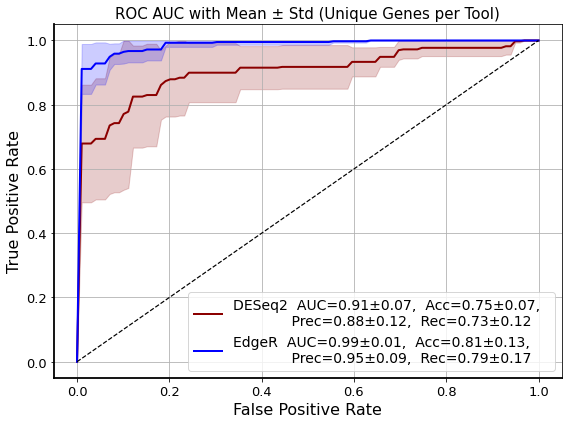

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, roc_curve

# Datasets
datasets = ["GSE152418", "GSE161731", "GSE171110", "PMC8202013"]


def load_sig_genes(tool, dataset):
    df = pd.read_csv(f"{tool}-{dataset}.csv")
    df = df[(df["FDR"] < 0.05) & (abs(df["logFC"]) > 1)]
    return set(df["GeneSymbol"])


def evaluate_pca(genes, raw_file):
    raw_df = pd.read_csv(raw_file)
    raw_df.set_index("Gene Symbol", inplace=True)
    raw_df = raw_df.loc[raw_df.index.intersection(genes)]

    if raw_df.shape[0] < 2:
        return np.nan, np.nan, np.nan, np.nan, raw_df.shape[0], None, None

    data = raw_df.T
    labels = data.index.str.contains("SARS-CoV-2").astype(int)

    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    pcs = PCA(n_components=2).fit_transform(scaled)
    pc1 = pcs[:, 0]

    pred = (pc1 > np.median(pc1)).astype(int)
    auc = roc_auc_score(labels, pc1)
    precision = precision_score(labels, pred)
    recall = recall_score(labels, pred)
    accuracy = accuracy_score(labels, pred)

    return auc, precision, recall, accuracy, raw_df.shape[0], labels, pc1


tools = ["DESeq2", "EdgeR"]
fpr_grid = np.linspace(0, 1, 100)

roc_data = {tool: [] for tool in tools}
metrics_data = {tool: {"auc": [], "precision": [], "recall": [], "accuracy": []} for tool in tools}

for tool in tools:
    other = "EdgeR" if tool == "DESeq2" else "DESeq2"

    for test_set in datasets:
        train_sets = [d for d in datasets if d != test_set]
        tool_genes = set.intersection(*[load_sig_genes(tool, d) for d in train_sets])
        other_genes = set.intersection(*[load_sig_genes(other, d) for d in train_sets])
        unique_genes = tool_genes - other_genes

        test_index = datasets.index(test_set) + 1
        raw_file = f"{test_index}-{test_set}-Ready.csv"

        auc, prec, rec, acc, n_genes, y_true, y_score = evaluate_pca(unique_genes, raw_file)

        if y_true is not None:
            fpr, tpr, _ = roc_curve(y_true, y_score)
            tpr_interp = np.interp(fpr_grid, fpr, tpr)
            tpr_interp[0] = 0.0
            tpr_interp[-1] = 1.0
            roc_data[tool].append(tpr_interp)

            # Store metrics
            metrics_data[tool]["auc"].append(auc)
            metrics_data[tool]["precision"].append(prec)
            metrics_data[tool]["recall"].append(rec)
            metrics_data[tool]["accuracy"].append(acc)


plt.figure(figsize=(8, 6))
colors = {"DESeq2": "darkred", "EdgeR": "blue"}

for tool in tools:
    tprs = np.array(roc_data[tool])
    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)


    aucs = np.array(metrics_data[tool]["auc"])
    precs = np.array(metrics_data[tool]["precision"])
    recalls = np.array(metrics_data[tool]["recall"])
    accs = np.array(metrics_data[tool]["accuracy"])

    legend_text = (
        f"{tool}  "
        f"AUC={aucs.mean():.2f}±{aucs.std():.2f},  "
        f"Acc={accs.mean():.2f}±{accs.std():.2f},  \n"
        f"             Prec={precs.mean():.2f}±{precs.std():.2f},  "
        f"Rec={recalls.mean():.2f}±{recalls.std():.2f}"
    )

    plt.plot(fpr_grid, mean_tpr, label=legend_text, color=colors[tool], lw=2)
    upper = np.minimum(mean_tpr + std_tpr, 1.0)
    lower = mean_tpr - std_tpr
    plt.fill_between(fpr_grid, lower, upper, color=colors[tool], alpha=0.2)

plt.plot([0, 1], [0, 1], "k--", lw=1.2)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("ROC AUC with Mean ± Std (Unique Genes per Tool)", fontsize=15)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)
plt.gca().spines["bottom"].set_linewidth(1.8)
plt.gca().spines["left"].set_linewidth(1.8)
plt.tight_layout()
plt.show()


In [145]:
def evaluate_pca(genes, raw_file):
    raw_df = pd.read_csv(raw_file)
    raw_df.set_index("Gene Symbol", inplace=True)
    raw_df = raw_df.loc[raw_df.index.intersection(genes)]

    if raw_df.shape[0] < 2:
        return np.nan, np.nan, np.nan, np.nan, raw_df.shape[0], None, None, None, None

    data = raw_df.T
    labels = data.index.str.contains("SARS-CoV-2").astype(int)

    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    pcs = PCA(n_components=2).fit_transform(scaled)
    pc1 = pcs[:, 0]
    pc2 = pcs[:, 1]
    pred = (pc1 > np.median(pc1)).astype(int)

    auc = roc_auc_score(labels, pc1)
    precision = precision_score(labels, pred)
    recall = recall_score(labels, pred)
    accuracy = accuracy_score(labels, pred)

    return auc, precision, recall, accuracy, raw_df.shape[0], labels, pc1, pc2, data.index


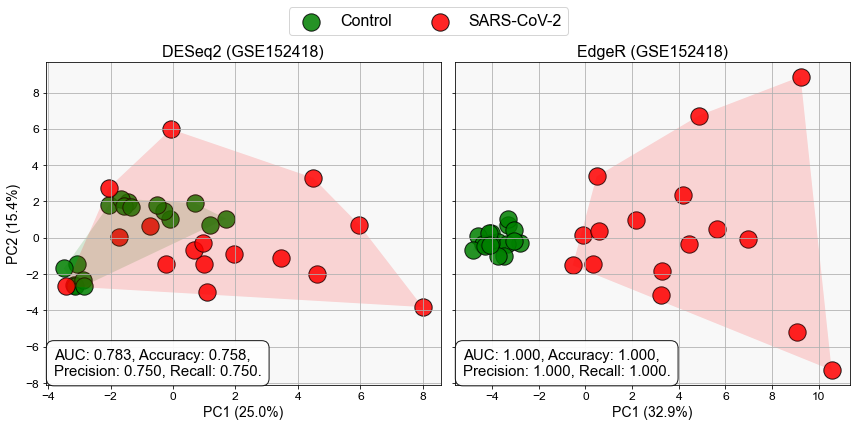

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from scipy.spatial import ConvexHull
import matplotlib


matplotlib.rcParams['font.family'] = 'Arial'


def draw_convex_hull(points, ax, color, alpha=0.2):
    if len(points) < 3:
        return
    hull = ConvexHull(points)
    vertices = np.append(hull.vertices, hull.vertices[0])
    ax.fill(points[vertices, 0], points[vertices, 1], color=color, alpha=alpha, lw=0)


test_set = "GSE152418"
test_index = datasets.index(test_set) + 1
raw_file = f"{test_index}-{test_set}-Ready.csv"

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for ax, tool in zip(axes, ["DESeq2", "EdgeR"]):
    other = "EdgeR" if tool == "DESeq2" else "DESeq2"
    train_sets = [d for d in datasets if d != test_set]

    tool_genes = set.intersection(*[load_sig_genes(tool, d) for d in train_sets])
    other_genes = set.intersection(*[load_sig_genes(other, d) for d in train_sets])
    unique_genes = tool_genes - other_genes

    auc, prec, rec, acc, n_genes, y_true, pc1, pc2, sample_names = evaluate_pca(unique_genes, raw_file)

    if y_true is None:
        ax.set_title(f"{tool}: Not enough genes", fontsize=14)
        continue


    raw_df = pd.read_csv(raw_file)
    raw_df.set_index("Gene Symbol", inplace=True)
    raw_df = raw_df.loc[raw_df.index.intersection(unique_genes)]
    data = raw_df.T
    labels = data.index.str.contains("SARS-CoV-2").astype(int)

    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(scaled)
    pc1, pc2 = pcs[:, 0], pcs[:, 1]
    evr = pca.explained_variance_ratio_

    for label_value, label_name, color in [(0, "Control", "green"), (1, "SARS-CoV-2", "red")]:
        idx = labels == label_value
        ax.scatter(pc1[idx], pc2[idx], label=label_name, color=color, s=300, edgecolor='black', alpha=0.85)
        draw_convex_hull(np.vstack([pc1[idx], pc2[idx]]).T, ax, color=color, alpha=0.15)


    box_text = (
        f"AUC: {auc:.3f}, "
        f"Accuracy: {acc:.3f}, \n"
        f"Precision: {prec:.3f}, "
        f"Recall: {rec:.3f}."
    )
    ax.text(0.02, 0.02, box_text, transform=ax.transAxes, fontsize=15,
            verticalalignment='bottom', horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.9))

    ax.set_title(f"{tool} (GSE152418)", fontsize=16)
    ax.set_xlabel(f"PC1 ({evr[0]*100:.1f}%)", fontsize=14)
    if ax is axes[0]:
        ax.set_ylabel(f"PC2 ({evr[1]*100:.1f}%)", fontsize=14)
    ax.tick_params(labelsize=12)
    ax.grid(True)
    ax.set_facecolor("#f8f8f8")


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [165]:

gene_list = sorted(unique_genes)
gene_df = pd.DataFrame(gene_list, columns=["UniqueGenes"])
gene_df.to_csv(f"{tool}_UniqueGenes_GSE152418.csv", index=False)

# Or print them to console
print(f"\n{tool} unique genes for GSE152418 ({len(gene_list)} genes):")
print(gene_list)



EdgeR unique genes for GSE152418 (65 genes):
['ALDH1L2', 'BFSP2', 'BMAL2', 'CA1', 'CD200', 'CDKN3', 'CENPA', 'CHAC1', 'CLEC4F', 'CRISP2', 'DCANP1', 'DIAPH3', 'DOC2B', 'DRC7', 'DYRK3', 'ERFE', 'ERG', 'ERICH3', 'ESCO2', 'FAM83A', 'FOSL1', 'GINS1', 'GYPA', 'H2AC13', 'H2AC17', 'H2AC8', 'H4C4', 'H4C8', 'HPDL', 'HTRA3', 'IFITM2', 'IL1R2', 'IMMP2L', 'INHBB', 'IQGAP3', 'KIF18A', 'KIF20A', 'KIF23', 'KNL1', 'LY6G6C', 'MAOA', 'MAOB', 'MDK', 'OIP5', 'OLR1', 'OXCT2', 'PDCD1LG2', 'PIMREG', 'PLXDC1', 'POLQ', 'PPP1R17', 'PRRT4', 'PRSS33', 'RHAG', 'SLC12A8', 'SLC16A14', 'SLC27A2', 'TDRD9', 'TLCD4', 'TMEM52B', 'TMEM54', 'TNFAIP8L3', 'TSPO2', 'UBQLNL', 'UPP1']


In [180]:
import pandas as pd

datasets = ["GSE152418", "GSE161731", "GSE171110", "PMC8202013"]

def load_sig_genes(tool, dataset):
    df = pd.read_csv(f"{tool}-{dataset}.csv")
    df = df[(df["FDR"] < 0.05) & (abs(df["logFC"]) > 1)]
    return set(df["GeneSymbol"])

def compute_overlap_metrics(A, B):
    intersection = A & B
    union = A | B
    do_A_B = len(intersection) / len(B) if len(B) > 0 else float('nan')
    do_B_A = len(intersection) / len(A) if len(A) > 0 else float('nan')
    jaccard = len(intersection) / len(union) if len(union) > 0 else float('nan')
    return {
        "DO(DESeq2, edgeR)": round(do_A_B, 4),
        "DO(edgeR, DESeq2)": round(do_B_A, 4),
        "Jaccard": round(jaccard, 4),
        "DESeq2_n": len(A),
        "edgeR_n": len(B),
        "Common": len(intersection),
        "DESeq2_Unique": len(A - B),
        "edgeR_Unique": len(B - A)
    }

results = []

for test_set in datasets:
    train_sets = [d for d in datasets if d != test_set]


    deseq2_genes = set.intersection(*[load_sig_genes("DESeq2", d) for d in train_sets])
    edger_genes = set.intersection(*[load_sig_genes("EdgeR", d) for d in train_sets])


    metrics = compute_overlap_metrics(deseq2_genes, edger_genes)
    metrics["TestSet"] = test_set
    results.append(metrics)


df_overlap = pd.DataFrame(results)
df_overlap = df_overlap[["TestSet", "DO(DESeq2, edgeR)", "DO(edgeR, DESeq2)", "Jaccard",
                         "DESeq2_n", "edgeR_n", "Common", "DESeq2_Unique", "edgeR_Unique"]]

df_overlap.to_csv("DirectionalOverlap_Jaccard_UniqueGenes.csv", index=False)
print(df_overlap)


      TestSet  DO(DESeq2, edgeR)  DO(edgeR, DESeq2)  Jaccard  DESeq2_n  \
0   GSE152418             0.8584             0.9271   0.8041       425   
1   GSE161731             0.9545             0.9566   0.9149       461   
2   GSE171110             0.8370             0.9502   0.8018       281   
3  PMC8202013             0.8271             0.9482   0.7913       328   

   edgeR_n  Common  DESeq2_Unique  edgeR_Unique  
0      459     394             31            65  
1      462     441             20            21  
2      319     267             14            52  
3      376     311             17            65  


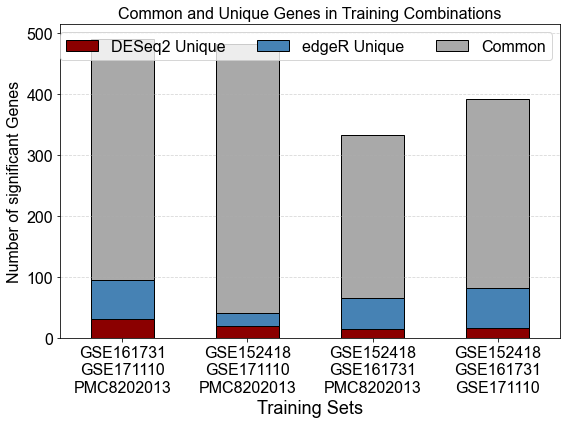

In [201]:
import pandas as pd
import matplotlib.pyplot as plt


datasets = ["GSE152418", "GSE161731", "GSE171110", "PMC8202013"]


def load_sig_genes(tool, dataset):
    df = pd.read_csv(f"{tool}-{dataset}.csv")
    df = df[(df["FDR"] < 0.05) & (abs(df["logFC"]) > 1)]
    return set(df["GeneSymbol"])


training_labels = []
common_counts = []
deseq2_unique_counts = []
edger_unique_counts = []

for i in range(len(datasets)):
    test_set = datasets[i]
    train_set = [d for j, d in enumerate(datasets) if j != i]
    label = "\n".join(train_set)

    deseq2_sets = [load_sig_genes("DESeq2", d) for d in train_set]
    edger_sets = [load_sig_genes("EdgeR", d) for d in train_set]

    deseq2_common = set.intersection(*deseq2_sets)
    edger_common = set.intersection(*edger_sets)

    common = deseq2_common & edger_common
    deseq2_only = deseq2_common - edger_common
    edger_only = edger_common - deseq2_common

    training_labels.append(label)
    common_counts.append(len(common))
    deseq2_unique_counts.append(len(deseq2_only))
    edger_unique_counts.append(len(edger_only))


df = pd.DataFrame({
    "Training Sets": training_labels,
    "Common": common_counts,
    "DESeq2 Unique": deseq2_unique_counts,
    "edgeR Unique": edger_unique_counts
})


df_plot = df.set_index("Training Sets")[["DESeq2 Unique", "edgeR Unique", "Common"]]
df_plot.plot(kind="bar", stacked=True, figsize=(8, 6), 
             color=["darkred", "steelblue", "darkgray"], edgecolor="black")

plt.title("Common and Unique Genes in Training Combinations", fontsize=16)
plt.ylabel("Number of significant Genes", fontsize=16)
plt.xlabel("Training Sets", fontsize=18)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend( fontsize=16, title_fontsize=18,ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
